In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [28]:
tweets = pd.read_csv('russian-troll-tweets/tweets.csv')
users = pd.read_csv('russian-troll-tweets/users.csv')

In [29]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203482 entries, 0 to 203481
Data columns (total 16 columns):
user_id                  195417 non-null float64
user_key                 203482 non-null object
created_at               203461 non-null float64
created_str              203461 non-null object
retweet_count            58083 non-null float64
retweeted                58083 non-null object
favorite_count           58083 non-null float64
text                     203461 non-null object
tweet_id                 201168 non-null float64
source                   58084 non-null object
hashtags                 203482 non-null object
expanded_urls            203482 non-null object
posted                   203482 non-null object
mentions                 203482 non-null object
retweeted_status_id      39651 non-null float64
in_reply_to_status_id    559 non-null float64
dtypes: float64(7), object(9)
memory usage: 24.8+ MB


In [30]:
tweets.head()

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN
1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN
2,1.710805e+09,cookncooks,1.487767e+12,2017-02-22 12:43:43,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,8.343832e+17,NaN,[],[],POSTED,[],NaN,NaN
3,2.584153e+09,queenofthewo,1.482765e+12,2016-12-26 15:06:41,NaN,NaN,NaN,RT @jww372: I don't have to guess your religio...,8.134006e+17,NaN,"[""ChristmasAftermath""]",[],POSTED,[],NaN,NaN
4,1.768260e+09,mrclydepratt,1.501987e+12,2017-08-06 02:36:24,NaN,NaN,NaN,RT @Shareblue: Pence and his lawyers decided w...,8.940243e+17,NaN,[],[],POSTED,[],NaN,NaN


In [31]:
users.head()

,id,location,name,followers_count,statuses_count,time_zone,verified,lang,screen_name,description,created_at,favourites_count,friends_count,listed_count
0,18710816.0,near Utah Ave & Lighthouse an,Robby Delaware,304.0,11484.0,Pacific Time (US & Canada),False,en,RobbyDelaware,"I support the free movement of people, ideas a...",Wed Jan 07 04:38:02 +0000 2009,17.0,670.0,13.0
1,100345056.0,still ⬆️Block⤵️Corner⬇️street,#Ezekiel2517✨...,1053.0,31858.0,NaN,False,en,SCOTTGOHARD,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,Tue Dec 29 23:15:22 +0000 2009,2774.0,1055.0,35.0
2,247165706.0,"Chicago, IL",B E C K S T E R✨,650.0,6742.0,Mountain Time (US & Canada),False,en,Beckster319,Rebecca Lynn Hirschfeld Actress.Model.Writer.A...,Fri Feb 04 06:38:45 +0000 2011,7273.0,896.0,30.0
3,249538861.0,NaN,Chris Osborne,44.0,843.0,NaN,False,en,skatewake1994,NaN,Wed Feb 09 07:38:44 +0000 2011,227.0,154.0,1.0
4,449689677.0,NaN,Рамзан Кадыров,94773.0,10877.0,Moscow,False,ru,KadirovRussia,"Пародийный аккаунт. Озвучиваю то, что политика...",Thu Dec 29 11:31:09 +0000 2011,0.0,7.0,691.0


In [33]:
tweets['date_created'] = pd.to_datetime(tweets['created_str'])

# convert ids to object datatype
columns = ['user_id', 'tweet_id', 'retweeted_status_id', 
           'retweeted_status_id', 'in_reply_to_status_id']

for column in columns:
    tweets[column] = tweets[column].astype('object')

In [34]:
tweets.dtypes

user_id                          object
user_key                         object
created_at                      float64
created_str                      object
retweet_count                   float64
retweeted                        object
favorite_count                  float64
text                             object
tweet_id                         object
source                           object
hashtags                         object
expanded_urls                    object
posted                           object
mentions                         object
retweeted_status_id              object
in_reply_to_status_id            object
date_created             datetime64[ns]
dtype: object

In [37]:
#range of date of the tweets from the dataset
start_date = tweets['date_created'].min()
end_date = tweets['date_created'].max()

print(start_date, end_date)

2014-07-14 18:04:55 2017-09-26 09:05:32


In [38]:
# dates stores the just date component of the date_created column
tweets['dates'] = pd.to_datetime(tweets['date_created'].dt.date)

In [40]:
tweets.head(1)

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,date_created,dates
0,1.86898e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.12346e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN,2016-03-22 18:31:42,2016-03-22


Now we want to filter just the useful columns from the dataset to explore correlations

In [ ]:

#I selected only some columns and assigned "tweet_id" to the index of the DataFrame
trolls = tweets[['user_key', 'date_created', 'dates', 'hashtags' ,'retweet_count', 'text', 'tweet_id']]

In [11]:
df = df.dropna(subset=['text']) #Dropped rows with NaN text
df['created_str'] = pd.to_datetime(df['created_str']) #convert the datetime to numerials that we can work with
df = df.rename(index=str, columns={"created_str": "created_at"})
df.head(10)

,user_key,created_at,retweet_count,favorite_count,text,hashtags,mentions
tweet_id,,,,,,,
7.123460278614057e+17,ryanmaxwell_1,2016-03-22 18:31:42,NaN,NaN,#IslamKills Are you trying to say that there w...,"[""IslamKills""]",[]
7.855849423569674e+17,detroitdailynew,2016-10-10 20:57:00,0.0,0.0,"Clinton: Trump should’ve apologized more, atta...",[],[]
8.34383165359788e+17,cookncooks,2017-02-22 12:43:43,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,[],[]
8.134006499122176e+17,queenofthewo,2016-12-26 15:06:41,NaN,NaN,RT @jww372: I don't have to guess your religio...,"[""ChristmasAftermath""]",[]
8.940243270493635e+17,mrclydepratt,2017-08-06 02:36:24,NaN,NaN,RT @Shareblue: Pence and his lawyers decided w...,[],[]
7.9130185460915e+17,giselleevns,2016-10-26 15:33:58,NaN,NaN,"@ModicaGiunta me, too!",[],[]
8.391767556886692e+17,baobaeham,2017-03-07 18:11:44,NaN,NaN,RT @MDBlanchfield: You’ll never guess who twee...,[],[]
8.148156759025295e+17,judelambertusa,2016-12-30 12:49:30,NaN,NaN,RT @100PercFEDUP: New post: WATCH: DIAMOND AND...,[],[]
7.925436225288929e+17,ameliebaldwin,2016-10-30 01:48:19,0.0,0.0,RT @AriaWilsonGOP: 3 Women Face Charges After ...,[],"[""ariawilsongop""]"


In [12]:
print(len(df['user_key'].unique()), "unique user keys")

454 unique user keys


In [13]:
#ploting histograms over the course of the year by converting the date into fractions after ther year

#source: https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

df['year_frac'] = df['created_at'].apply(year_fraction)
df.head()

,user_key,created_at,retweet_count,favorite_count,text,hashtags,mentions,year_frac
tweet_id,,,,,,,,
7.123460278614057e+17,ryanmaxwell_1,2016-03-22 18:31:42,NaN,NaN,#IslamKills Are you trying to say that there w...,"[""IslamKills""]",[],2016.221311
7.855849423569674e+17,detroitdailynew,2016-10-10 20:57:00,0.0,0.0,"Clinton: Trump should’ve apologized more, atta...",[],[],2016.773224
8.34383165359788e+17,cookncooks,2017-02-22 12:43:43,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,[],[],2017.142466
8.134006499122176e+17,queenofthewo,2016-12-26 15:06:41,NaN,NaN,RT @jww372: I don't have to guess your religio...,"[""ChristmasAftermath""]",[],2016.983607
8.940243270493635e+17,mrclydepratt,2017-08-06 02:36:24,NaN,NaN,RT @Shareblue: Pence and his lawyers decided w...,[],[],2017.594521


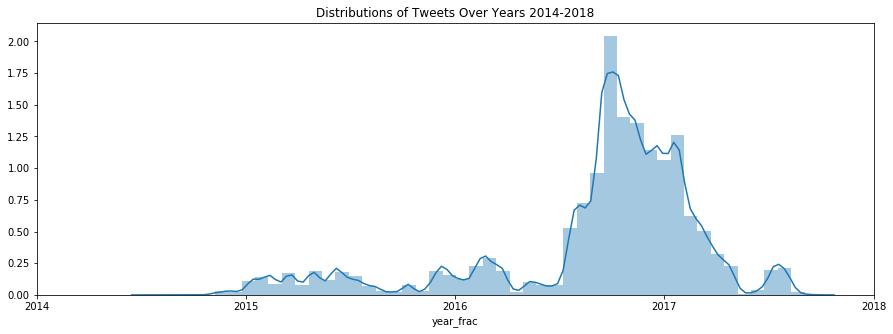

In [21]:
plt.figure(figsize=(15, 5))

sns.distplot(df['year_frac'], label = 'year')
plt.title('Distributions of Tweets Over Years 2014-2018')
plt.xticks(np.arange(2014, 2019, 1));

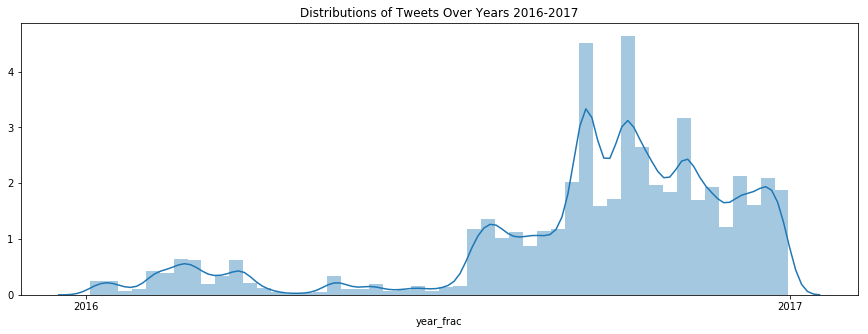

In [22]:
temp = df[(df['year_frac'] < 2017)]
tweets_election_period = temp[temp['year_frac'] > 2016]

plt.figure(figsize=(15, 5))

sns.distplot(tweets_election_period['year_frac'], label = 'election')
plt.title('Distributions of Tweets Over Years 2016-2017')
plt.xticks(np.arange(2016, 2018, 1));